## Accessing Hydrologic Data Via Web Services

This script demonstrates how to access USGS flow data via the CUAHSI Hydroserver
and plot the minimum, maximum, average, and 15-minute flow data


### Required packages
This script uses the suds-py3 package to access data from the CUAHSI Hydroserver and the USGS. Pandas will perform the 
resampling, and visualizations will be created with matplotlib. Finally, the 
_datetime package will parse the date data and allow us to specify time intervals for the
final visualization.



In [1]:
from suds.client import Client
from pandas import Series
import matplotlib.pyplot as plt
from _datetime import datetime


### Assigning Data Objects

Here we specify the webservice that will extract the data, a site code, a variable code, and the desired dates. 
This script uses the USGS gage station on Bonita Creek in Irvine, California and the variable code for 
flow. Using Pandas and Datetime, we can extract data from August 8, 2019 to the current date.


In [2]:
wsdlURL = 'http://hydroportal.cuahsi.org/nwisuv/cuahsi_1_1.asmx?WSDL'
siteCode = 'NWISUV:11048600'
variableCode = 'NWISUV:00060' # code for flow
beginDate = '2019-08-01'
endDate = datetime.now().isoformat()


### Extracting Variables with CUAHSI
Using the CUAHSI Hydroserver, the suds client can access flow data from the USGS and import it directly into Python. 
We first create a new object named "NWIS" for calling the web service methods. We then use the GetValuesObject method to 
return the flow data for Bonita Creek in Irvine, California from August 8, 2019 until now.


In [3]:
NWIS = Client(wsdlURL).service

response = NWIS.GetValuesObject(siteCode, variableCode, beginDate, endDate)

### Indexing Site Name
Using Pandas, we extract the site name from the data by indexing the first element of the web service response
created above.

In [4]:
siteName = response.timeSeries[0].sourceInfo.siteName



### Creating Lists for Storing Data
We will soon index the flow and date values from the web series response in a similar manner to how we extracted the 
site name. We must first create empty lists to store the indexed flow and date values.


In [5]:
flow = []  # The values
dates = []  # The dates



### Indexing Flow Values and Dates
Now we will index the flow values and their associated dates from the web service response.


In [6]:
values = response.timeSeries[0].values[0].value



### Appending Data to Lists
We will now separate the flow and date values and put them in their respective lists using a for loop.

In [7]:
for v in values:
    flow.append(float(v.value))
    dates.append(v._dateTime)



### Creating a time series Object
Using Pandas, we will create a time series object from the flow data, using the dates as an index.


In [8]:
ts = Series(flow, index=dates)



### Resampling with Pandas
Using the resample function from Pandas, we resample the 15-minute flow data to daily flow data and calculate the daily 
mean, minimum, and maximum flow values. 


In [9]:
mean_discharge = ts.resample(rule='24H', base=0).mean()
max_discharge = ts.resample(rule='24H', base=0).max()
min_discharge = ts.resample(rule='24H', base=0).min()



### Creating the Figure
Using the Matplotlib package, we will create an empty figure and axis subplot that can be populated with the flow data.

Using the plot function in matplotlib, we then plot the original 15-minute data in a light color behind the resampled
mean, max, and minumum values in green, red, and blue on the blank plot created above.

Using the blank subplot, we will set a y-axis label for the discharge values, an x-axis label for the date values, 
a grid on the plot, and a title for the whole plot using the name of the site. We will also create a legend at the upper
left of the plot with a frame around it. We also format the line width and font size for the legend.

Finally the plot is displayed with the using plt.show()

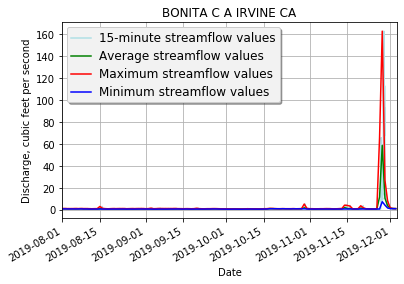

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)  # arguments for add_subplot - add_subplot(nrows, ncols, plot_number)

# Plotting series data
ts.plot(color='powderblue', linestyle='solid', label='15-minute streamflow values')
mean_discharge.plot(color='green', linestyle='solid', label='Average streamflow values')
max_discharge.plot(color='red', linestyle='solid', label='Maximum streamflow values')
min_discharge.plot(color='blue', linestyle='solid', label='Minimum streamflow values')

# Formatting Axes
ax.set_ylabel('Discharge, cubic feet per second')
ax.set_xlabel('Date')
ax.grid(True)
ax.set_title(siteName)

# Adding a legend
legend = ax.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.95')
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width

# Displaying the plot
plt.show()

